# Overview

Here is a description of the data sets:

Response Database:  
* This file includes details on each individual commercial that aired on TV since 2014  and the attributed performance or responses for each commercial.. There is a field definition tab explaining what each variable means but I am happy to answer any questions about the data beyond the field definitions.

Database:  
* This data represents overall daily business performance for a different brand and should not be combined with the response database. 
* The data in this file is broken out into two types of variables– predictors or drivers, and outcomes. 
    * The spend variables would be the drivers and the purchases (in orange) are the outcomes or results that can be measured in concert with the spends and any relevant exogenous factors. 
    * The purchases can also be analyzed independently from the spends for insights into business growth, seasonality, etc.
    * Although the data has been recoded to protect the privacy of the advertiser, we can tell you that the directionality and the relationships over time and across variables have not been changed.  
    * We can also tell you that the advertiser is in the online travel category (think Kayak, Priceline, Expedia).

Exercise
* For the <b>response database</b>, the exercise is fairly open ended.  Our objective here is see how you approach a new data set. What insights can you derive pertaining to what drives website volume and what doesn’t? What approach do you take to gathering these insights with respect to tools/software, models, etc.?
* For the <b>database</b> part of the exercise, you might consider the following prompts to guide your analysis:
    - What are the most impactful drivers of total purchases?
    - If you had an extra dollar to spend, where would you spend it to yield the maximum return on your investment?
    - Can you quantify the longitudinal/compounding effect of marketing over time?
    - There are several periods of time in which there was no television advertising 
        – how would you measure the impact of the absence of TV? Are you able to quantify this?

While we’ve broken out purchases by new and returning and different vertical types, these are of secondary importance to total purchases. Any other insights you’d like to provide outside of these questions is welcomed. Additionally, you may use any of these data sets as a platform to discuss creative ideas around analysis broadly, even if you don’t have the time or resources to perform the analysis, ideas qualify as solid work product too.  

Please don’t hesitate to reach out with any questions about the data, the exercise, or the position. Please take this coming week with the data and send your insights in whatever format you like (Word, Email, Powerpoint, Tableau, etc.).

In [1]:
import pandas as pd
import seaborn.apionly as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Read the data sets

In [24]:
database_raw = pd.read_excel(
    "data/Database.xlsx",
    header=[0, 1, 2]
)
database_raw.dtypes

                                                                                Date                               
MARKETING SPENDS WITH PARTNERS                Unnamed: 0_level_1                Remarketing Spend                      float64
                                              Unnamed: 1_level_1                Partner Search Spend                   float64
                                              Unnamed: 2_level_1                Partner A Hotel Spend                  float64
                                              Unnamed: 3_level_1                Partner B Hotel Spend                  float64
                                              Unnamed: 4_level_1                Partner C Hotel Spend                  float64
                                              Unnamed: 5_level_1                Other Partner Spend                    float64
                                              Unnamed: 6_level_1                Partner TOTAL                          flo

In [25]:
response_raw = (
    pd.read_excel(
        "data/Response Database.xlsx", 
        header=0
    )
    .iloc[:, :17]
)
response_raw.dtypes

Response                   int64
Date              datetime64[ns]
Time                      object
Network                   object
Daypart                   object
Rate                     float64
Imps (000)               float64
CPM                      float64
Property                  object
Start                     object
End                       object
Buy Type                  object
Length                    object
C/B/S                     object
Program                   object
Week of           datetime64[ns]
Creative Title            object
dtype: object

In [26]:
database_raw.head()

MARKETING SPENDS WITH PARTNERS                       \
                       Unnamed: 0_level_1   Unnamed: 1_level_1   
Date                    Remarketing Spend Partner Search Spend   
2015-01-01                       36813.64             39730.54   
2015-01-02                       41297.77             50297.34   
2015-01-03                       37550.40             39719.12   
2015-01-04                       39006.15             40016.30   
2015-01-05                       35591.18             56930.77   

                                                                              \
              Unnamed: 2_level_1    Unnamed: 3_level_1    Unnamed: 4_level_1   
Date       Partner A Hotel Spend Partner B Hotel Spend Partner C Hotel Spend   
2015-01-01              28657.73              25030.39              12503.82   
2015-01-02              33937.95              34147.43              14660.26   
2015-01-03              30088.45              38768.40              11431.65   
2015-01-04              32730.76              38668.44              13072.17   
2015-01-05              32376.76              35723.47              23534.97   

                                                   \
            Unnamed: 5_level_1 Unnamed: 6_level_1   
Date       Other Partner Spend      Partner TOTAL   
2015-01-01            16259.28          158995.40   
2015-01-02            22460.13          196800.88   
2015-01-03            24716.81          182274.83   
2015-01-04            18327.53          181821.35   
2015-01-05            23711.85          207869.00   

           MARKETING SPENDS WITH AFFILIATES                                \
                         Unnamed: 7_level_1            Unnamed: 8_level_1   
Date         Affiliate Standard Hotel Spend Affiliate Premium Hotel Spend   
2015-01-01                         14095.02                      11951.52   
2015-01-02                         17634.10                      15081.16   
2015-01-03                         14781.58                      11972.12   
2015-01-04                         14831.60                      13526.64   
2015-01-05                         18945.79                      18465.50   

                                                ...           \
                    Unnamed: 9_level_1          ...            
Date       Affiliate Other Hotel Spend          ...            
2015-01-01                     8864.16          ...            
2015-01-02                    10087.10          ...            
2015-01-03                     8895.49          ...            
2015-01-04                     9380.47          ...            
2015-01-05                    10820.58          ...            

                OUTCOME VARIABLE: PURCHASES                               \
           NEW CUSTOMER vs REPEAT CUSTOMERS                                
Date          New Customer Flight Purchases New Customer Hotel Purchases   
2015-01-01                             3998                         9598   
2015-01-02                             4859                        11775   
2015-01-03                             4156                         9834   
2015-01-04                             4304                         8616   
2015-01-05                             5762                         9059   

                                                                             \
                                                                              
Date       Repeat Customer Flight Purchases Repeat Customer Hotel Purchases   
2015-01-01                             5338                           26032   
2015-01-02                             6996                           31122   
2015-01-03                             5765                           25794   
2015-01-04                             5880                           22308   
2015-01-05                             8418                           26528   

                                            

In [27]:
response_raw.head()

,Response,Date,Time,Network,Daypart,Rate,Imps (000),CPM,Property,Start,End,Buy Type,Length,C/B/S,Program,Week of,Creative Title
0,12,2014-02-17,06:46:00,TBS,Morning,1725.20,278.0,6.205755,DAYTIME,06:00:00,15:00:00,GR,30,NatCbl,NaN,2014-02-17,Yoga
1,0,2014-02-17,08:35:00,ESPNEWS,Morning,82.65,24.0,3.443750,Day,06:00:00,18:00:00,PE,30,NatCbl,NaN,2014-02-17,Sauna
2,0,2014-02-17,08:56:00,DIY,Morning,110.20,13.0,8.476923,Morning Rotation M-F 7:0,07:00:00,09:00:00,GR,30,NatCbl,NaN,2014-02-17,Sauna
3,5,2014-02-17,09:16:00,MSNBC,Daytime,870.20,133.0,6.542857,MSNBC LIVE M-F 9A-5P-,09:00:00,17:00:00,GR,30,NatCbl,NaN,2014-02-17,Sauna
4,22,2014-02-17,09:51:00,MSNBC,Daytime,870.20,133.0,6.542857,MSNBC LIVE M-F 9A-5P-,09:00:00,17:00:00,GR,30,NatCbl,NaN,2014-02-17,Yoga


In [28]:
database_cleaned = (
    pd.read_excel(
        "data/Database.xlsx",
        header=[2]
    )
    .reset_index(drop=True)
    .rename({"index" : "Date"})
)
database_cleaned["TV TOTAL"] = database_cleaned["TV Campaign 1"] +\
database_cleaned["TV Campaign 2"] +\
database_cleaned["TV Campaign 3"]
database_cleaned["TV Present"] = pd.Categorical(database_cleaned["TV TOTAL"] > 0).labels

C:\Users\Ulric\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: 'labels' is deprecated. Use 'codes' instead


In [146]:
database_cleaned["year"] = database_cleaned["Date"].apply(lambda x: x.year)
database_cleaned["month"] = database_cleaned["Date"].apply(lambda x: x.month)
database_cleaned["day"] = database_cleaned["Date"].apply(lambda x: x.day)
database_cleaned["unix_second"] = database_cleaned["Date"].apply(lambda x: x.value / 1e9)
database_cleaned["unix_second_normed"] = database_cleaned["Date"].apply(lambda x: x.value / 1e9 - min(database_cleaned["unix_second"]) )


In [67]:
database_cleaned["Date"][0]

Timestamp('2015-01-01 00:00:00')

In [68]:
pd.to_datetime(database_cleaned["Date"][0].value / 1e9, unit="s")

Timestamp('2015-01-01 00:00:00')

In [54]:
database_cleaned["unix_second"].describe()

count    1.004000e+03
mean     1.463400e+09
std      2.505377e+07
min      1.420070e+09
25%      1.441735e+09
50%      1.463400e+09
75%      1.485065e+09
max      1.506730e+09
Name: unix_second, dtype: float64

In [74]:
pd.to_datetime(database_cleaned["unix_second"][0], unit="s")

Timestamp('2015-01-01 00:00:00')

In [57]:
pd.to_datetime(1.420070e+09, unit="s"), pd.to_datetime(1.506730e+09, unit="s")

(Timestamp('2014-12-31 23:53:20'), Timestamp('2017-09-30 00:06:40'))

In [61]:
pd.to_datetime("2016-09-08").value

1473292800000000000

In [62]:
pd.to_datetime(1473292800000000000, unit="ns")

Timestamp('2016-09-08 00:00:00')

In [65]:
pd.to_datetime(pd.to_datetime(1473292800000000000, unit="ns").value / 1e9, unit="s")

Timestamp('2016-09-08 00:00:00')

In [58]:
database_cleaned["Date"].describe()

count                    1004
unique                   1004
top       2016-09-08 00:00:00
freq                        1
first     2015-01-01 00:00:00
last      2017-09-30 00:00:00
Name: Date, dtype: object

In [147]:
database_cleaned["unix_second"].describe()

count    1.004000e+03
mean     1.463400e+09
std      2.505377e+07
min      1.420070e+09
25%      1.441735e+09
50%      1.463400e+09
75%      1.485065e+09
max      1.506730e+09
Name: unix_second, dtype: float64

In [148]:
database_cleaned["unix_second_normed"].describe()

count    1.004000e+03
mean     4.332960e+07
std      2.505377e+07
min      0.000000e+00
25%      2.166480e+07
50%      4.332960e+07
75%      6.499440e+07
max      8.665920e+07
Name: unix_second_normed, dtype: float64

In [47]:
database_cleaned.dtypes

Date                                   datetime64[ns]
Remarketing Spend                             float64
Partner Search Spend                          float64
Partner A Hotel Spend                         float64
Partner B Hotel Spend                         float64
Partner C Hotel Spend                         float64
Other Partner Spend                           float64
Partner TOTAL                                 float64
Affiliate Standard Hotel Spend                float64
Affiliate Premium Hotel Spend                 float64
Affiliate Other Hotel Spend                   float64
Affiliate Standard Flight Spend               float64
Affiliate Premium Flight Spend                float64
Affiliate Other Flight Spend                  float64
Affiliate Standard Rental Car Spend           float64
Affiliate Premium Rental Car Spend            float64
Affiliate Other Rental Car Spend              float64
Affiliate VP\nCost                            float64
Affiliate TOTAL             

# Database data set questions

* What are the most impactful drivers of total purchases?
* If you had an extra dollar to spend, where would you spend it to yield the maximum return on your investment?
* Can you quantify the longitudinal/compounding effect of marketing over time?
* There are several periods of time in which there was no television advertising 
    * how would you measure the impact of the absence of TV? Are you able to quantify this?

In [30]:
database_cleaned.head()

,Date,Remarketing Spend,Partner Search Spend,Partner A Hotel Spend,Partner B Hotel Spend,Partner C Hotel Spend,Other Partner Spend,Partner TOTAL,Affiliate Standard Hotel Spend,Affiliate Premium Hotel Spend,...,Repeat Customer Flight Purchases,Repeat Customer Hotel Purchases,Type 1 Flight Purchase,Type 1 Hotel Purchase,Type 2 Flight Purchase,Type 2 Hotel Purchase,Total Flight Purchases,Total Hotel Purchases,TV TOTAL,TV Present
0,2015-01-01,36813.64,39730.54,28657.73,25030.39,12503.82,16259.28,158995.40,14095.02,11951.52,...,5338,26032,688,19455,8647,16175,9336,35629,0.0,0
1,2015-01-02,41297.77,50297.34,33937.95,34147.43,14660.26,22460.13,196800.88,17634.10,15081.16,...,6996,31122,918,22825,10938,20072,11856,42897,0.0,0
2,2015-01-03,37550.40,39719.12,30088.45,38768.40,11431.65,24716.81,182274.83,14781.58,11972.12,...,5765,25794,764,18526,9158,17102,9921,35628,0.0,0
3,2015-01-04,39006.15,40016.30,32730.76,38668.44,13072.17,18327.53,181821.35,14831.60,13526.64,...,5880,22308,745,15836,9439,15087,10184,30924,0.0,0
4,2015-01-05,35591.18,56930.77,32376.76,35723.47,23534.97,23711.85,207869.00,18945.79,18465.50,...,8418,26528,995,19547,13185,16041,14181,35588,0.0,0


In [270]:
def plotTimeSeries(df, xLabel, yColLabelList, figsize=(15, 10)):

    plotData = df

    for yColLabel in yColLabelList: 
        sns.plt.plot(
                plotData[xLabel], plotData.loc[:, yColLabel],
                "x",
                label = yColLabel
            )

# Plot outcomes ==  purchases over time

Observations:
* Hotel purchases
    * Much greater variance in hotel purchases
    * Much more income from hotel purchases
* All purchases
    * Local maxima in July and August
    * Local minima in November and December 


(array([ 735658.,  735780.,  735903.,  736024.,  736146.,  736269.,
         736389.,  736511.,  736634.]), <a list of 9 Text xticklabel objects>)

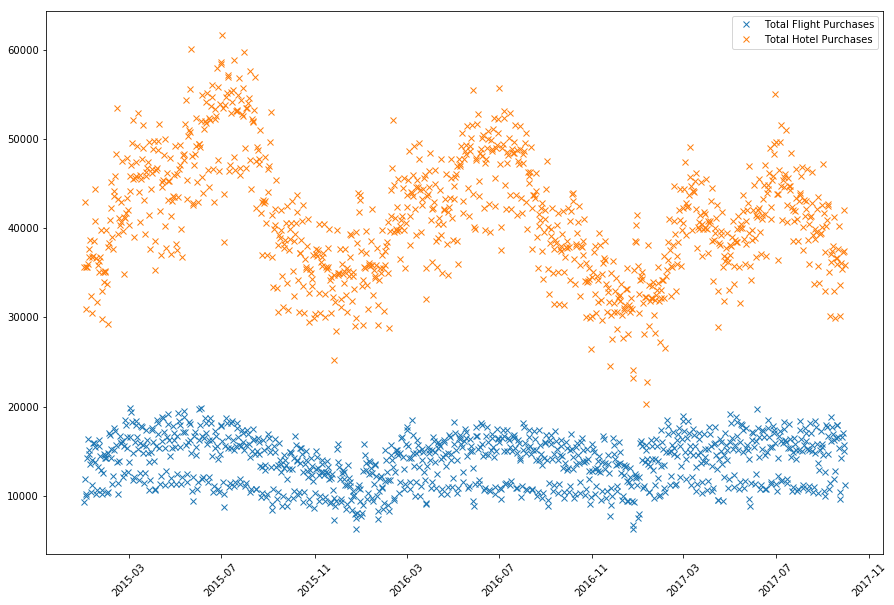

In [274]:
sns.plt.figure(figsize=(15, 10))

plotTimeSeries(database_cleaned, 
                xLabel="Date",
               yColLabelList = ["Total Flight Purchases", "Total Hotel Purchases"]
              )

sns.plt.legend(loc="best")
sns.plt.xticks(rotation=45)

# Plot the major spending

(array([ 735658.,  735780.,  735903.,  736024.,  736146.,  736269.,
         736389.,  736511.,  736634.]), <a list of 9 Text xticklabel objects>)

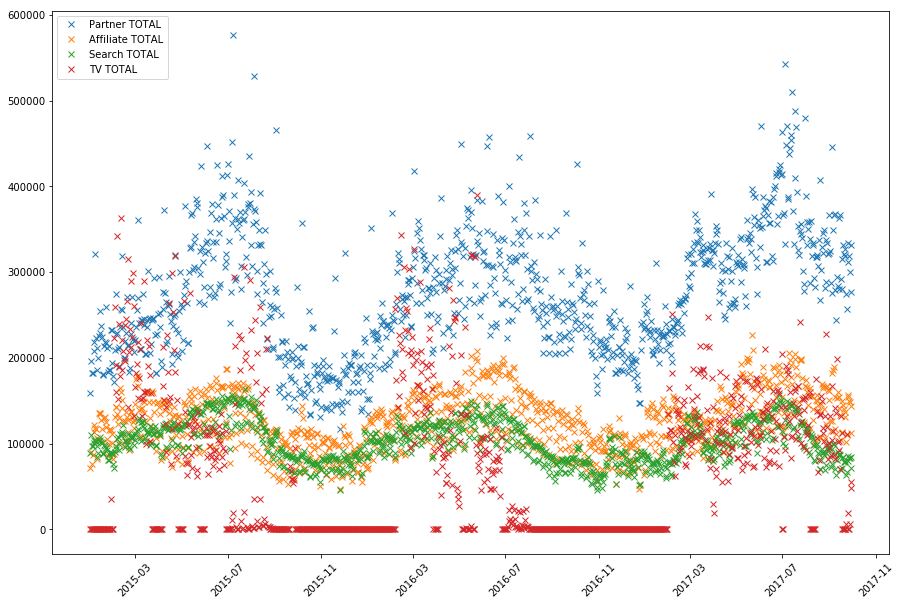

In [275]:
sns.plt.figure(figsize=(15, 10))

plotTimeSeries(database_cleaned, 
                xLabel="Date",
               yColLabelList = [
                   'Partner TOTAL',
           'Affiliate TOTAL', 
            'Search TOTAL', 
            "TV TOTAL",]
              )
sns.plt.legend(loc="best")
sns.plt.xticks(rotation=45)

In [33]:
database_cleaned.columns

Index(['Date', 'Remarketing Spend', 'Partner Search Spend',
       'Partner A Hotel Spend', 'Partner B Hotel Spend',
       'Partner C Hotel Spend', 'Other Partner Spend', 'Partner TOTAL',
       'Affiliate Standard Hotel Spend', 'Affiliate Premium Hotel Spend',
       'Affiliate Other Hotel Spend', 'Affiliate Standard Flight Spend',
       'Affiliate Premium Flight Spend', 'Affiliate Other Flight Spend',
       'Affiliate Standard Rental Car Spend',
       'Affiliate Premium Rental Car Spend',
       'Affiliate Other Rental Car Spend', 'Affiliate VP\nCost',
       'Affiliate TOTAL', 'Brand Search Mobile Spend',
       'Brand Search Non-Mobile Spend', 'Flight Search Spend',
       'Other Search Spend', 'Hotel Mobile Search Spend',
       'Hotel Non-Mobile Search Spend', 'Rental Car Mobile\nSpend',
       'Rental Car Non-Mobile\nSpend', 'Search TOTAL', 'TV Campaign 1',
       'TV Campaign 2', 'TV Campaign 3', 'New Customer Flight Purchases',
       'New Customer Hotel Purchases', 'Repea

### Model time using regression (unix_seconds)

In [199]:
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Total Hotel Purchases   R-squared:                       0.630
Model:                               OLS   Adj. R-squared:                  0.624
Method:                    Least Squares   F-statistic:                     112.2
Date:                   Tue, 13 Mar 2018   Prob (F-statistic):          4.17e-201
Time:                           14:52:23   Log-Likelihood:                -9763.0
No. Observations:                   1004   AIC:                         1.956e+04
Df Residuals:                        988   BIC:                         1.964e+04
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.605e+04    404.325    113.898      0.000      4.53e+04  4.68e+04
x1          1.535e+04   2291.279      6.699      0.000      1.09e+04  1.98e+04
x2         -3.768e+04   7173.050     -5.254      0.000     -5.18e+04 -2.36e+04
x3         -1.092e+05   2.22e+04     -4.924      0.000     -1.53e+05 -6.57e+04
x4         -9.434e+04   3.39e+04     -2.786      0.005     -1.61e+05 -2.79e+04
x5          3.007e+05   7.43e+04      4.048      0.000      1.55e+05  4.46e+05
x6          4.483e+05   6.57e+04      6.819      0.000      3.19e+05  5.77e+05
x7          -4.61e+05   1.16e+05     -3.970      0.000     -6.89e+05 -2.33e+05
x8         -5.522e+05    6.3e+04     -8.769      0.000     -6.76e+05 -4.29e+05
x9           3.87e+05   9.55e+04      4.050      0.000      1.99e+05  5.74e+05
x10         3.065e+05   3.15e+04      9.737      0.000      2.45e+05  3.68e+05
x11        -1.752e+05   4.26e+04     -4.109      0.000     -2.59e+05 -9.15e+04
x12        -8.041e+04   7869.380    -10.218      0.000     -9.58e+04  -6.5e+04
x13         4.018e+04   9753.644      4.120      0.000       2.1e+04  5.93e+04
x14         8101.0869    776.199     10.437      0.000      6577.899  9624.275
x15        -3663.2939    895.879     -4.089      0.000     -5421.338 -1905.250
==============================================================================
Omnibus:                        8.277   Durbin-Watson:                   1.119
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.203
Skew:                          -0.213   Prob(JB):                       0.0166
Kurtosis:                       3.120   Cond. No.                     9.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

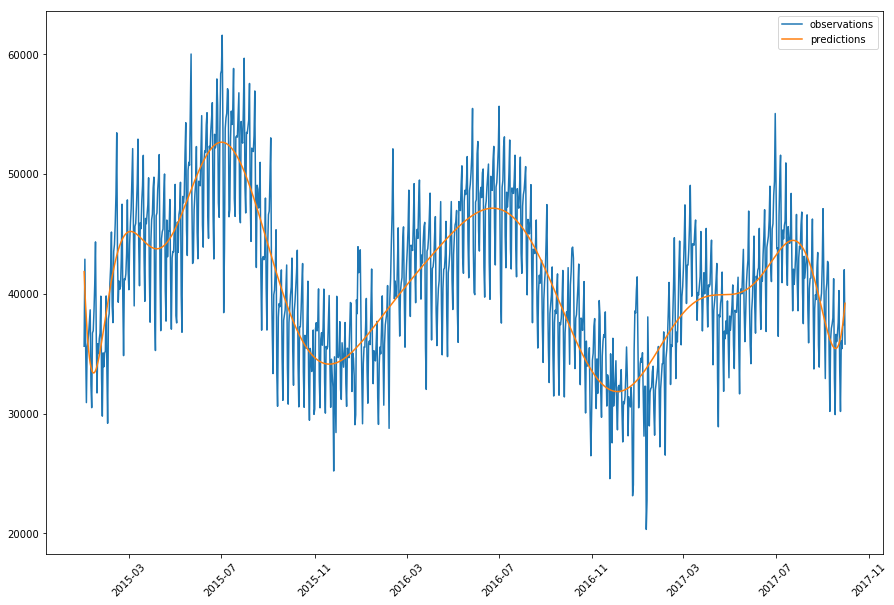

In [278]:
def fitTimeRegression(df, yCol, xCols, polynomialDegree=15):
    
    X = df.loc[:, xCols]
    y = df.loc[:, yCol]
    
    X_preprocessing = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=polynomialDegree)
    )
    X_processed = X_preprocessing.fit_transform(X)
    
    timeRegressionModel = (
        sm.OLS(
            y, 
            X_processed,
        )
        .fit()
    )
    
    predictions = timeRegressionModel.predict(X_processed)
    
    sns.plt.figure(figsize = (15,10))
    sns.plt.plot(df["Date"], y, label = "observations")
    sns.plt.plot(df["Date"], predictions, label = "predictions")
    sns.plt.legend(loc="best")
    sns.plt.xticks(rotation = 45)
    
    return X_preprocessing, timeRegressionModel, predictions


preprocPipeline, fittedModel, predictions = fitTimeRegression(database_cleaned, "Total Hotel Purchases", ["unix_second_normed"])
fittedModel.summary()

In [233]:
database_cleaned["timeRegressionPreds"] = predictions

In [234]:
database_cleaned.head()

,Date,Remarketing Spend,Partner Search Spend,Partner A Hotel Spend,Partner B Hotel Spend,Partner C Hotel Spend,Other Partner Spend,Partner TOTAL,Affiliate Standard Hotel Spend,Affiliate Premium Hotel Spend,...,month,day,unix_second,unix_second2,unix_second3,unix_second4,unix_second5,timePreds,unix_second_normed,timeRegressionPreds
0,2015-01-01,36813.64,39730.54,28657.73,25030.39,12503.82,16259.28,158995.40,14095.02,11951.52,...,1,1,1.420070e+09,2.016600e+18,2.863714e+27,4.066675e+36,5.774965e+45,43970.932110,0.0,41860.820051
1,2015-01-02,41297.77,50297.34,33937.95,34147.43,14660.26,22460.13,196800.88,17634.10,15081.16,...,1,2,1.420157e+09,2.016845e+18,2.864237e+27,4.067665e+36,5.776722e+45,43965.082510,86400.0,40317.113343
2,2015-01-03,37550.40,39719.12,30088.45,38768.40,11431.65,24716.81,182274.83,14781.58,11972.12,...,1,3,1.420243e+09,2.017091e+18,2.864759e+27,4.068655e+36,5.778480e+45,43959.232910,172800.0,38969.159885
3,2015-01-04,39006.15,40016.30,32730.76,38668.44,13072.17,18327.53,181821.35,14831.60,13526.64,...,1,4,1.420330e+09,2.017336e+18,2.865282e+27,4.069645e+36,5.780238e+45,43953.383310,259200.0,37802.341011
4,2015-01-05,35591.18,56930.77,32376.76,35723.47,23534.97,23711.85,207869.00,18945.79,18465.50,...,1,5,1.420416e+09,2.017582e+18,2.865805e+27,4.070636e+36,5.781996e+45,43947.533709,345600.0,36802.822351


# Remove trend component

(array([ 735658.,  735780.,  735903.,  736024.,  736146.,  736269.,
         736389.,  736511.,  736634.]), <a list of 9 Text xticklabel objects>)

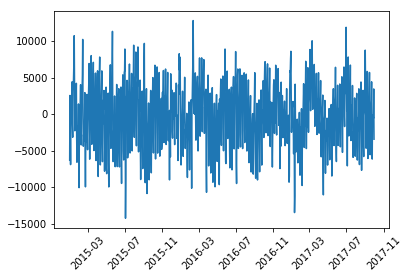

In [279]:
sns.plt.plot(
    database_cleaned["Date"],
    database_cleaned["Total Hotel Purchases"] - database_cleaned["timeRegressionPreds"]
)
sns.plt.xticks(rotation=45)

### model time using arima

# Hotel Purchases model

[[ 1.         -1.61227668 -1.6363575  -0.5700737  -0.84510595  0.15600778
  -1.73032652]
 [ 1.         -1.08756319 -1.07032731  0.29655258 -0.84510595 -0.13645273
  -1.72687621]
 [ 1.         -1.28917455 -1.50458933 -0.23651761 -0.84510595 -0.39182711
  -1.72342591]]
                              OLS Regression Results                             
Dep. Variable:     Total Hotel Purchases   R-squared:                       0.770
Model:                               OLS   Adj. R-squared:                  0.768
Method:                    Least Squares   F-statistic:                     555.6
Date:                   Tue, 13 Mar 2018   Prob (F-statistic):          8.12e-314
Time:                           14:00:50   Log-Likelihood:                -9524.9
No. Observations:                   1004   AIC:                         1.906e+04
Df Residuals:                        997   BIC:                         1.910e+04
Df Model:                              6                                    

(Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True))]),
 array([ 39560.94528989,  41861.4086015 ,  39675.5997987 , ...,
         36694.39066851,  37700.58582275,  35463.80102911]))

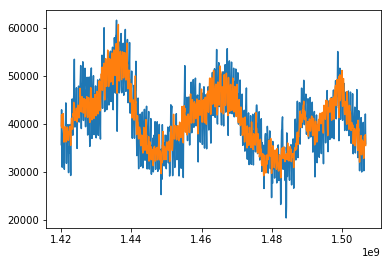

In [257]:
def fitCovariateModel(df, yCol, xCols):
    
    X = df.loc[:, xCols]
    y = df.loc[:, yCol]
    
    X_preprocessing = make_pipeline(
        StandardScaler(),
    )
    X_processed = sm.tools.add_constant(X_preprocessing.fit_transform(X))
    
    print(X_processed[:3])
    
    model = (
        sm.OLS(
            y, 
            X_processed,
            hasconst=True
        )
        .fit()
    )
    
    print(model.summary(xname = xCols))
    
    predictions = model.predict(X_processed)
    
    
    sns.plt.plot(df["unix_second"], y)
    sns.plt.plot(df["unix_second"], predictions)
    
    return X_preprocessing, model, predictions

fitCovariateModel(database_cleaned, yCol ='Total Hotel Purchases', xCols = [
            'Partner TOTAL',
           'Affiliate TOTAL', 
            'Search TOTAL', 
            "TV TOTAL",
            "timeRegressionPreds",
            "unix_second_normed"
        ])

In [34]:
def fitOLS(y, X):
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())

In [48]:
fitOLS(
    database_cleaned['Total Hotel Purchases'], 
    database_cleaned
    .loc[
        :, 
        [
            "year",
            "month",
            "day",
            'Partner TOTAL',
           'Affiliate TOTAL', 
            'Search TOTAL', 
            "TV TOTAL"
        ]
        
    ]
)

                              OLS Regression Results                             
Dep. Variable:     Total Hotel Purchases   R-squared:                       0.992
Model:                               OLS   Adj. R-squared:                  0.992
Method:                    Least Squares   F-statistic:                 1.762e+04
Date:                   Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                           11:29:52   Log-Likelihood:                -9679.8
No. Observations:                   1004   AIC:                         1.937e+04
Df Residuals:                        997   BIC:                         1.941e+04
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
year        

# Flight model

In [17]:
database.dtypes

                                                                                Date                               
MARKETING SPENDS WITH PARTNERS                Unnamed: 0_level_1                Remarketing Spend                      float64
                                              Unnamed: 1_level_1                Partner Search Spend                   float64
                                              Unnamed: 2_level_1                Partner A Hotel Spend                  float64
                                              Unnamed: 3_level_1                Partner B Hotel Spend                  float64
                                              Unnamed: 4_level_1                Partner C Hotel Spend                  float64
                                              Unnamed: 5_level_1                Other Partner Spend                    float64
                                              Unnamed: 6_level_1                Partner TOTAL                          flo

In [18]:
fitOLS(
    database_flat_indices['Total Flight Purchases'], 
    database_flat_indices
    .loc[
        :, 
        [
            'Partner TOTAL',
           'Affiliate TOTAL', 
            'Search TOTAL', 
            "TV TOTAL"
        ]
    ]
)

                              OLS Regression Results                              
Dep. Variable:     Total Flight Purchases   R-squared:                       0.979
Model:                                OLS   Adj. R-squared:                  0.979
Method:                     Least Squares   F-statistic:                 1.154e+04
Date:                    Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                            11:22:59   Log-Likelihood:                -9083.4
No. Observations:                    1004   AIC:                         1.817e+04
Df Residuals:                        1000   BIC:                         1.819e+04
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Pa

# Effect of TV presence

In [19]:
database_flat_indices.dtypes

Date                                   datetime64[ns]
Remarketing Spend                             float64
Partner Search Spend                          float64
Partner A Hotel Spend                         float64
Partner B Hotel Spend                         float64
Partner C Hotel Spend                         float64
Other Partner Spend                           float64
Partner TOTAL                                 float64
Affiliate Standard Hotel Spend                float64
Affiliate Premium Hotel Spend                 float64
Affiliate Other Hotel Spend                   float64
Affiliate Standard Flight Spend               float64
Affiliate Premium Flight Spend                float64
Affiliate Other Flight Spend                  float64
Affiliate Standard Rental Car Spend           float64
Affiliate Premium Rental Car Spend            float64
Affiliate Other Rental Car Spend              float64
Affiliate VP\nCost                            float64
Affiliate TOTAL             

In [20]:
fitOLS(
    database_flat_indices['Total Hotel Purchases'], 
    database_flat_indices
    .loc[
        :, 
        [
            'Partner TOTAL',
           'Affiliate TOTAL', 
            'Search TOTAL', 
            'TV Present'
        ]
    ]
)

                              OLS Regression Results                             
Dep. Variable:     Total Hotel Purchases   R-squared:                       0.984
Model:                               OLS   Adj. R-squared:                  0.984
Method:                    Least Squares   F-statistic:                 1.569e+04
Date:                   Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                           11:22:59   Log-Likelihood:                -10017.
No. Observations:                   1004   AIC:                         2.004e+04
Df Residuals:                       1000   BIC:                         2.006e+04
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Partner TOTA

In [21]:
fitOLS(
    database_flat_indices['Total Flight Purchases'], 
    database_flat_indices
    .loc[
        :, 
        [
            'Partner TOTAL',
           'Affiliate TOTAL', 
            'Search TOTAL', 
            'TV Present'
        ]
    ]
)

                              OLS Regression Results                              
Dep. Variable:     Total Flight Purchases   R-squared:                       0.980
Model:                                OLS   Adj. R-squared:                  0.980
Method:                     Least Squares   F-statistic:                 1.226e+04
Date:                    Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                            11:22:59   Log-Likelihood:                -9053.8
No. Observations:                    1004   AIC:                         1.812e+04
Df Residuals:                        1000   BIC:                         1.814e+04
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Pa

In [22]:
fitOLS(
    database_flat_indices['Total Flight Purchases'], 
    database_flat_indices
    .loc[
        :, 
        [
            'Remarketing Spend',
            'Partner Search Spend',
           'Partner A Hotel Spend', 'Partner B Hotel Spend',
           'Partner C Hotel Spend', 'Other Partner Spend', 'Partner TOTAL',
           'Affiliate Standard Hotel Spend', 'Affiliate Premium Hotel Spend',
           'Affiliate Other Hotel Spend', 'Affiliate Standard Flight Spend',
           'Affiliate Premium Flight Spend', 'Affiliate Other Flight Spend',
           'Affiliate Standard Rental Car Spend',
           'Affiliate Premium Rental Car Spend',
           'Affiliate Other Rental Car Spend', 'Affiliate VP\nCost',
           'Affiliate TOTAL', 'Brand Search Mobile Spend',
           'Brand Search Non-Mobile Spend', 'Flight Search Spend',
           'Other Search Spend', 'Hotel Mobile Search Spend',
           'Hotel Non-Mobile Search Spend', 'Rental Car Mobile\nSpend',
           'Rental Car Non-Mobile\nSpend', 'Search TOTAL', 'TV Campaign 1',
           'TV Campaign 2', 'TV Campaign 3'
        ]
    ]
)

                              OLS Regression Results                              
Dep. Variable:     Total Flight Purchases   R-squared:                       0.995
Model:                                OLS   Adj. R-squared:                  0.994
Method:                     Least Squares   F-statistic:                     6611.
Date:                    Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                            11:22:59   Log-Likelihood:                -8400.8
No. Observations:                    1004   AIC:                         1.686e+04
Df Residuals:                         977   BIC:                         1.699e+04
Df Model:                              27                                         
Covariance Type:                nonrobust                                         
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------

In [23]:
(
    database_flat_indices
    .loc[
        :, 
        [
            'Remarketing Spend',
            'Partner Search Spend',
        ]
        
    ]
)

,Remarketing Spend,Partner Search Spend
0,36813.64,39730.54
1,41297.77,50297.34
2,37550.40,39719.12
3,39006.15,40016.30
4,35591.18,56930.77
5,28639.14,72889.19
6,27137.59,71469.21
7,26024.28,70990.78
8,22553.70,71217.46
9,18829.81,56928.58
